In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
df_charging_data = pd.read_csv('../charging_sessions.csv')
df_weather = pd.read_csv('../weather_burbank_airport.csv')

### General data overview 

#### EV charging data

In [3]:
df_charging_data.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [4]:
df_charging_data.describe()

,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [5]:
df_charging_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [6]:
df_charging_data.isnull().sum()

Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4088
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17263
userInputs          17263
dtype: int64

#### Weather data

In [7]:
df_weather.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


### Data preparation

In [3]:
def unpack_nested_column(value):
    if pd.isnull(value):
        # Return an empty dict for null values
        return {}  
    else:
        # Parse string as a Python literal
        return ast.literal_eval(value)  

# Unpack nested userInputs column
nested_data = df_charging_data['userInputs'].apply(unpack_nested_column)

# Create df for data in userInputs column
nested_df = pd.json_normalize(nested_data.apply(lambda x: x[0] if x else {}))

In [4]:
nested_df.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID
0,250.0,25.0,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",194.0
1,280.0,70.0,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",4275.0
2,400.0,8.0,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",344.0
3,400.0,8.0,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",1117.0
4,400.0,16.0,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",334.0


In [5]:
# Concatenate dataframes and drop duplicate/unneeded columns

full_charging_df = pd.concat([df_charging_data.drop(columns=['userInputs', 'Unnamed: 0']), 
                     nested_df.drop(columns=['userID'])], axis=1)

Transform the ...Time columns datatype

In [6]:
time_columns = ["doneChargingTime", "connectionTime", "disconnectTime", "modifiedAt", "requestedDeparture"]
# Transform to pandas datetime datatype
full_charging_df[time_columns] = full_charging_df[time_columns].apply(
    lambda x: pd.to_datetime(x, utc=True))

In [7]:
# Transform the timestamps from UTC to the correct timezone
full_charging_df[time_columns] = full_charging_df[time_columns].apply(
    lambda col: col.dt.tz_convert("America/Los_Angeles"))

In [8]:
# Check new timestamps
full_charging_df["connectionTime"]
# -> -08:00 and -07:00 are the offsets from UTC time (-8 hours in winter, -7 in summer)

0       2020-01-02 05:08:54-08:00
1       2020-01-02 05:36:50-08:00
2       2020-01-02 05:56:35-08:00
3       2020-01-02 05:59:58-08:00
4       2020-01-02 06:00:01-08:00
                   ...           
66445   2019-07-31 11:08:04-07:00
66446   2019-07-31 11:40:41-07:00
66447   2019-07-31 12:04:40-07:00
66448   2019-07-31 12:19:47-07:00
66449   2019-07-31 12:21:47-07:00
Name: connectionTime, Length: 66450, dtype: datetime64[ns, America/Los_Angeles]

In [9]:
# Calculate the timespan in which the car was connected to the station
full_charging_df["connectionTimespan"] = full_charging_df["disconnectTime"] - full_charging_df["connectionTime"]
full_charging_df["connectionTimespan"].describe()

count                        66450
mean     0 days 06:17:34.578209179
std      0 days 04:51:41.391314114
min                0 days 00:02:04
25%         0 days 02:51:57.750000
50%                0 days 06:11:44
75%         0 days 09:13:31.500000
max               10 days 05:16:09
Name: connectionTimespan, dtype: object

In [51]:
# Filter rows where 'connectionTimespan' has negative or zero values
# A zero or negative timespan may indicate incorrect or missing data
negative_timespan = full_charging_df[full_charging_df["connectionTimespan"] <= pd.Timedelta(0)]
len(negative_timespan)

0

Aggregate time data / dose this count as feature engineering?

In [11]:
full_charging_df['connectionMonth'] = full_charging_df['connectionTime'].dt.month
full_charging_df['connectionWeekdayName'] = full_charging_df['connectionTime'].dt.day_name()
full_charging_df['isWeekend'] = full_charging_df['connectionTime'].dt.weekday >= 5

<Axes: >

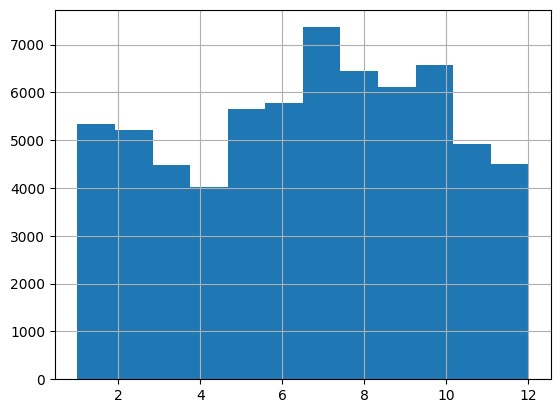

In [12]:
# Plot a histogram of 'connectionMonth' to visualize charging frequency by month
# This can reveal seasonal trends, e.g., higher charges in summer months compared to winter months
# Note: More charges in summer does not necessarily mean more kilowatt usage
full_charging_df['connectionMonth'].hist(bins=12)

<Axes: >

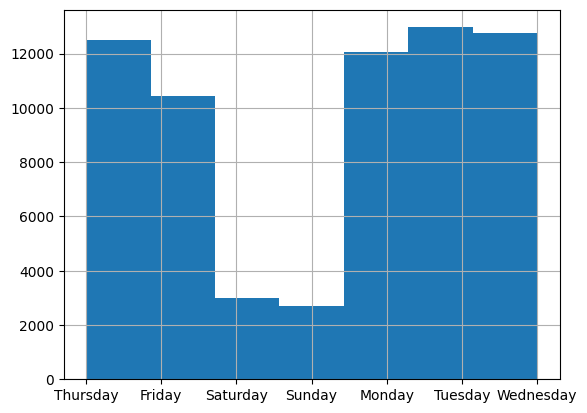

In [13]:
# Plot a histogram of 'connectionMonth' to visualize charging frequency by month
# This can reveal weekly trends, e.g., more charges during the week than in the weekend
full_charging_df['connectionWeekdayName'].hist(bins=7)

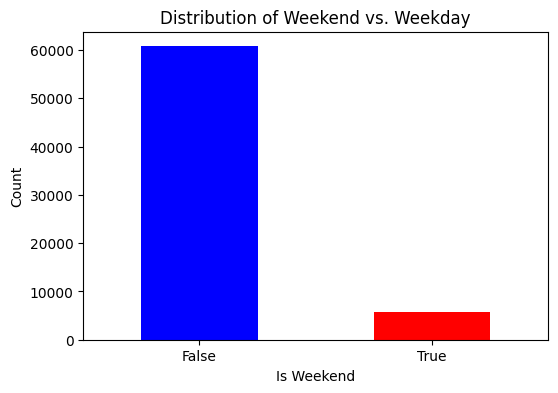

In [14]:
# Count values of True and False in the isWeekend column
weekend_counts = full_charging_df['isWeekend'].value_counts()

# Plot as a bar plot
plt.figure(figsize=(6, 4))
weekend_counts.plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.xlabel("Is Weekend")
plt.ylabel("Count")
plt.title("Distribution of Weekend vs. Weekday")
plt.show()

In [15]:
# Final dataframe (currently)
full_charging_df.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,...,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,connectionTimespan,connectionMonth,connectionWeekdayName,isWeekend
0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,...,25.0,100.0,463.0,2020-01-02 05:09:39-08:00,True,2020-01-02 12:51:54-08:00,0 days 06:02:21,1,Thursday,False
1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,...,70.0,250.0,595.0,2020-01-02 05:37:11-08:00,True,2020-01-02 15:31:50-08:00,0 days 09:01:31,1,Thursday,False
2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,...,8.0,20.0,60.0,2020-01-02 05:57:17-08:00,True,2020-01-02 06:56:35-08:00,0 days 10:42:47,1,Thursday,False
3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,...,8.0,20.0,65.0,2020-01-02 06:00:03-08:00,True,2020-01-02 07:04:58-08:00,0 days 02:38:41,1,Thursday,False
4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,...,16.0,40.0,504.0,2020-01-02 06:00:13-08:00,True,2020-01-02 14:24:01-08:00,0 days 08:08:39,1,Thursday,False
